# Normalized graph cuts within ball

Code was created with accordance to article by Wenbing Tao, Hai Jin, Yimin Zhang, Liman Liu, and Desheng Wang.
<br>
Link: https://ieeexplore.ieee.org/document/4604825

In [3]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import math
import time
from datetime import timedelta
from skimage import io, filters, measure
from scipy import ndimage, spatial
import networkx as nx

In [4]:
# Graph does not need to be directed - we work directly only on ,,cut matrix"
# arr is array of image in grayscale (width x height) - it's elements are intenisities of pixels
# I - sensivity of weights for intensity changes
# X - sensivity of weights for spatial location between nodes

# Create cut matrix for an image

def create_cut_matrix(arr, I, X, radius):
    
    M = np.zeros((256,256))
    points = []
    width = arr.shape[0]
    height = arr.shape[1]
    
    for i in range(width):
        for j in range(height):
            points.append((i,j))
            
    points = np.asarray(points)
    
    Tree = spatial.KDTree(points, radius)
    
    def set_capacity(x1, y1, x2, y2, I, X):
        
        dist = spatial.distance.pdist([(x1,y1),(x2,y2)],'euclidean')
        capacity = np.exp( - ((abs(arr[x1][y1] - arr[x2][y2]) / I + dist / X )) )
    
        return capacity

    for x in points:
        
        idx = Tree.query_ball_point(x, radius)
        for y in points[idx]:
            
            capacity = set_capacity(x[0], x[1], y[0], y[1], I, X)
            M[arr[x[0]][x[1]]][arr[y[0]][y[1]]] += capacity
            M[arr[y[0]][y[1]]][arr[x[0]][x[1]]] += capacity
            
    return M

# Define function that returns optimal cut for given cut matrix M, threshold of cut t and minimal cut

def get_NCut(t, M, NCut_min):
    
    cutAB = 0                                # cut with sets A and B
    assoAA = 0                               # sum of weights between pixels in A
    assoBB = 0                               # sum of weights between pixels in B
    
    for i in range(0,t+1):
        for j in range(t+1,256):
            cutAB += M[i][j]
            
    for i in range(0,t+1):
        for j in range(i,t+1):
            assoAA += M[i][j]
            
    for i in range(t+1,256):
        for j in range(i,256):
            assoBB += M[i][j]
            
    A = assoAA + cutAB
    B = assoBB + cutAB
    
    if A != 0 and B != 0:
        NCutAB = (cutAB / A) + (cutAB / B)    # get normalized cut
    else:
        NCutAB = NCut_min
        
    return NCutAB

# Get optimal threshold that results in minimal normalized cut for given ,,cut matrix" M 

def get_treshold(M):
    
    # Initialization
    t = 0
    t_min = 0
    NCut_min = 2
    
    # Search for best treshold and cut
    while t <= 255:
        NCutAB = get_NCut(t, M, NCut_min)
        if NCutAB < NCut_min:
            NCut_min = NCutAB
            t_min = t
        t += 1
        
    return NCut_min, t_min

# Process image with obtained threshold

def treshold_image(arr, treshold):
    
    result = arr
    width = arr.shape[0]
    height = arr.shape[1]
    
    for i in range(width):
        for j in range(height):
            if arr[i][j] > treshold :
                result[i][j] = 0
            else:
                result[i][j] = 1
                
    return result

In [13]:
# image is an unopened picture, I and X need to be specified by user (possible automatic detection ??)

def pipeline(image, I, X, radius):
    
    im = Image.open(image).convert('L')
    
    im_arr = np.array(im, dtype='int64')    # int for possibility to iterate!
    
    # Threshold picture by cut matrix method
    
    M = create_cut_matrix(im_arr, I, X, radius)
    
    N, T = get_treshold(M)
    
    result = treshold_image(im_arr, T)
    
    return result

There are 1 objects in the image.
Time of calcualtions: 0:19:08.343000


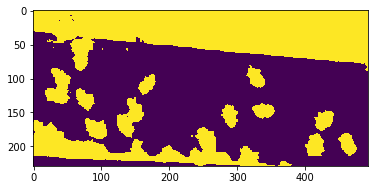

In [6]:
start_time = time.monotonic()
result = pipeline('3.png', 625, 4, 4)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)

There are 1 objects in the image.
Time of calcualtions: 0:08:28.016000


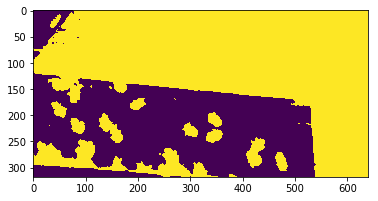

In [8]:
start_time = time.monotonic()
result = pipeline('2.png', 625, 4, 1)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)

There are 1 objects in the image.
Time of calcualtions: 0:05:58.266000


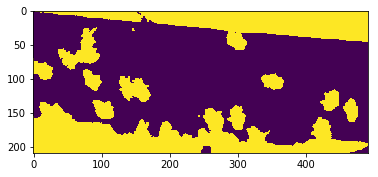

In [9]:
start_time = time.monotonic()
result = pipeline('5.png', 625, 4, 4)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)

There are 1 objects in the image.
Time of calcualtions: 0:18:48.297000


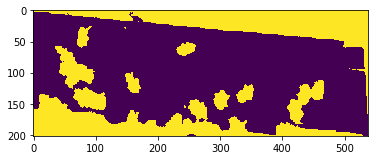

In [11]:
start_time = time.monotonic()
result = pipeline('6.png', 625, 4, 4)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)

Time of calcualtions: 0:06:49.766000


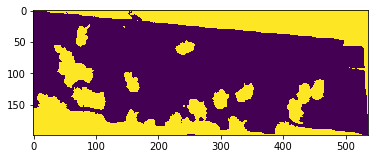

In [15]:
start_time = time.monotonic()
result = pipeline('7.png', 625, 4, 4)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)

Time of calcualtions: 0:07:24.281000


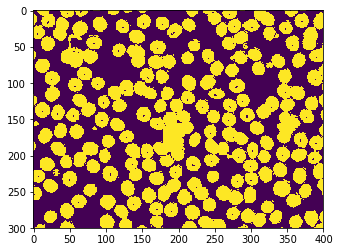

In [16]:
start_time = time.monotonic()
result = pipeline('red_blood_cells.png', 625, 4, 4)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)

Time of calcualtions: 0:09:12.329000


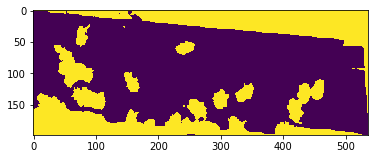

In [17]:
start_time = time.monotonic()
result = pipeline('7.png', 625, 0.6, 6)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)

Time of calcualtions: 0:10:42.391000


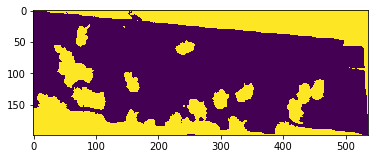

In [18]:
start_time = time.monotonic()
result = pipeline('7.png', 625, 6, 6)
end_time = time.monotonic()
print('Time of calcualtions: {}'.format(timedelta(seconds = end_time - start_time)))
plt.imshow(result)